<a href="https://colab.research.google.com/github/Fernando-Guerrero-Diaz/ADA-Informes/blob/main/AlgoritmoKruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema: Árbol Recubridor Mínimo

**Entrada:** Grafo no dirigido $G = (V,E)$ donde cada arco $e$ tiene un costo $c_e$.

**Salida:** Árbol recubridor Mínimo  $T$ de $G$, que no genere ciclos y que minimice el costo entre los nodos.

El problema del Árbol Recubridor Mínimo es un problema de optimización, en el cual queremos conectar un conjunto de objetos de la forma más economica posible. 

El algoritmo de Kruskal es un algoritmo voraz que resuelve el problema de forma fácil y sencilla, la cual selecciona los arcos con menor costo y los agrega al árbol. A continuación se presenta una implementación de este algoritmo.

#2. Algoritmo de Kruskal

##2.1 Código

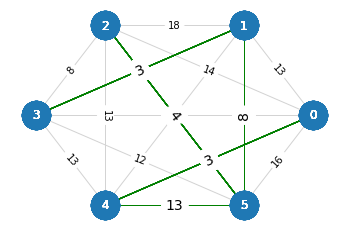

In [71]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def Partition(array, start, end):
  if start>=end: return start
  pivot=array[end-1]
  i,j = start, start
  while j < end-1:

    if array[j][2]>= pivot[2]:
      j=j+1
    else:
      aux = array[j]
      array[j]=array[i]
      array[i]= aux
      i=i+1
      j=j+1
  array[end-1]=array[i]
  array[i]=pivot
  return i

def QuickSort(array,start,end):
  if start+1<end:
    pivot = Partition(array,start,end)
    QuickSort(array,start,pivot)
    QuickSort(array,pivot+1,end)

def graph_instance_creator(V):
  graph = []
  for i in range(V):
    for j in range(i+1, V):
      graph.append([i, j, random.randint(1, 20)])
  
  return graph


def graph_to_nxgraph(graph):
  nxgraph = nx.Graph()
  for i in graph:
    nxgraph.add_edge(i[0], i[1], weight=i[2])
  return nxgraph

def getNodos(graph):
  nodos ={}
  for i in graph:
    nodos[i[0]] = i[0];
    nodos[i[1]] = i[1];
  return nodos

def IsAcyclic(graph, x):
  nodos = getNodos(graph)
  stack =[]
  arcos = [([0]*x) for i in range(x)]
  for n in nodos: 
    nodos[n]="no descubierto"
  for n in graph: 
    arcos[n[0]][n[1]]="disponible"
    arcos[n[1]][n[0]]="disponible"
  for n in nodos.keys():
    stack.append(int(n))
    break
  while len(stack)>0:
    n=stack.pop()
    if nodos[n]=="no descubierto": 
       nodos[n]="descubierto"
       for i in range(x):
          if arcos[n][i] == "disponible":
             arcos[n][i] = "usado"
             arcos[i][n] = "usado"
             stack.append(i)
    elif nodos[n] == "descubierto":
      return False
  return True



def Kruskal(graph,visualize=False,verbose=False):
  if visualize:
    G = graph_to_nxgraph(graph)
    labels = nx.get_edge_attributes(G,'weight')
    pos=nx.circular_layout(G)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=10)
    nx.draw(G,pos, with_labels=True, node_size=800, font_color="white", font_size=12, font_weight="normal", width  =1.0, edge_color ="lightgray")
  x = len(getNodos(graph))
  QuickSort(graph,0,len(graph))
  if verbose: print("Ordenando los arcos por peso con QuickSort")
  new = []
  for n in graph:
    new.append(n)
    if (IsAcyclic(new,x)): 
      if verbose: print("Agregando el arco entre ", n[0], " y ", n[1])
    else:
      new.pop()
      if verbose: print("No se agrega el arco entre ", n[0], " y ", n[1], ", forma un ciclo")
    if visualize:
      T = graph_to_nxgraph(new)
      labels = nx.get_edge_attributes(T,'weight')
      nx.draw_networkx_edge_labels(T,pos,edge_labels=labels,font_size=14)
      nx.draw(T,pos, with_labels=True, node_size=800, font_color="white", font_size=12, font_weight="normal", width  =1.0, edge_color ="green")

  return new


graph = graph_instance_creator(6)



mst = Kruskal(graph,True)







##2.2 Descripción del Algoritmo

El algoritmo recibe al grafo `G`, el cual tiene un arreglo `V` de nodos (vertices) y un arreglo `E` de arcos (edges).

1. Se define al árbol `T` vacío.

2. Se ordena el arreglo `E` de menor a mayor, usando un algoritmo de ordenamiento como **QuickSort**.

3. Se recorre el arreglo ordenado `E` desde el principio. Se verifica si agregar el arco `E[i]` no genera un ciclo en el arbol `T`, en cuyo caso se agrega a `T`.

4. Una vez recorrido el arreglo `E` se retorna `T`.

Para verificar si el árbol T es acíclico, se realizará la siguiente operación.

1. Se crea un diccionario vacío para los nodos, una matriz para los arcos y un stack vacío para realizar **DepthFirstSearch** en `T`.

2. Se elige un nodo y se le asigna como visitado en el diccionario.

3. Se Agregan los nodos alcanzables desde el nodo seleccionado (usando arcos disponibles) al stack y se marcan los arcos como usados.

4. Se repiten los 2 pasos anteriores con el primer nodo del stack. Si el nodo ya fue visitado, entonces se retorna `False`, ya que esto significa que hay un ciclo.

5. Si se explora el arbol sin encontrar un nodo previamente visitado, entonces retorna `True`.

##2.3 Ejecución paso a paso.

Ordenando los arcos por peso con QuickSort
Agregando el arco entre  3  y  4
Agregando el arco entre  0  y  2
Agregando el arco entre  2  y  4
Agregando el arco entre  1  y  4
No se agrega el arco entre  2  y  3 , forma un ciclo
No se agrega el arco entre  0  y  1 , forma un ciclo
No se agrega el arco entre  1  y  2 , forma un ciclo
No se agrega el arco entre  0  y  4 , forma un ciclo
No se agrega el arco entre  1  y  3 , forma un ciclo
No se agrega el arco entre  0  y  3 , forma un ciclo


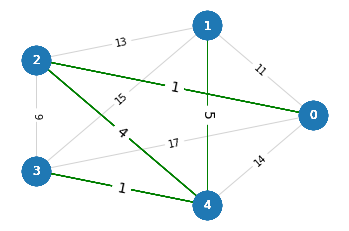

In [75]:
graph = graph_instance_creator(5)

mst = Kruskal(graph,True,True)

#3.Correctitud

**Teorema(correctitud)**: *El algoritmo de Kruskal recibe un grafo no dirigido de nodos conectados por arcos de distinto peso, y retorna el árbol recubridor mínimo que minimiza el costo total de los arcos.*

Digamos que $G$ es nuestro grafo conexo no dirigido inicial, y que $T$ es el arbol recubridor generado por el algoritmo de Kruskal. En base a la implementación, sabemos de que $T$ no posee ciclos y que es conexo ya que siempre agrega el primer arco que une dos componentes de $G$.

Digamos ahora que $T_1$ es el árbol recubridor mínimo de $G$ que comparte la mayor cantidad de arcos con $T$. Si $T_1 = T$, entonces $T$ es el árbol recubridor mínimo que estamos buscando. Si no es así, entonces consideremos al primer arco $i$ que se encuentra en $T$ y no en $T_1$. Sean $C_1$ y $C_2$ los componentes conectados por $i$. Ya que $T_1$ es un árbol, $T_1 + e$ tendrá un ciclo, y en este ciclo existirá el arco $f$ que también conecta a los componentes $C_1$ y $C_2$. Por lo tanto, podemos decir que $T_1 + e - f$ es un árbol recubridor de $G$; llamémoslo $T_2$. 

Ya que $e$ fue elegido por nuestro algoritmo antes que $f$, el peso de $e$ es al menos igual que el peso de $f$, y dado que $T_1$ es un árbol recubridor mínimo, los pesos de estos dos arcos deben ser iguales. Por lo tanto, $T_2$ es un árbol recubridor mínimo con más aristas en común con $T$ que $T_1$, y como esto contradice lo que aseguramos anteriormente, se prueba por contradicción que $T$ tiene que ser un árbol mínimo recubridor.

#4. Tiempo de Ejecución

**Teorema(Tiempo de ejecución):** 
*El algoritmo **Kruskal** tiene un tiempo de ejecución de $O(nlogn)$, donde $n$ es el número de nodos en el grafo.*

#5. Experimentos

##5.1 Crecimiento del tiempo de ejecución

A continuación se presenta un gráfico con el tiempo que demora el algorítmo de kruskal a medida que aumentamos el número de nodos.

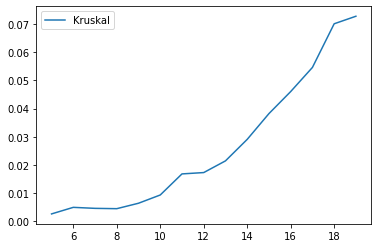

In [74]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[] 
y1=[]


for n in range(5,20):

  graph = graph_instance_creator(n)

  t1 = repeat(setup="from __main__ import Kruskal", stmt=f"Kruskal({graph})", repeat=1, number=10)

  x.append(n)

  y1.append(t1)



plt.plot(x,y1)

plt.legend(["Kruskal"])


Como se puede apreciar, se observa un crecimiento casi cuadrático, lo cual no concuerda con el tiempo de ejecución esperado. Pero esto se debe a que `graph_instance_creator` se encarga de conectar absolutamente todos los nodos, por lo cual no se puede considerar como un caso promedio. En general, los grafos no suelen verse tan interconectados.